In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [4]:
df = pd.read_csv('telecomChurnData.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')


In [7]:


# Check for missing values (NaN) in the entire DataFrame
missing_values = df.isnull().sum()

# Print rows with NaN values
rows_with_nan = df[df.isnull().any(axis=1)]

# Display the result
print("Missing Values Summary:")
print(missing_values)

print("\nRows with NaN Values:")
rows_with_nan


Missing Values Summary:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Rows with NaN Values:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [8]:
#  Churn variable shows that these are all still subscribing customers.

In [9]:
# Calculate the proportion of missing values in the 'TotalCharges' column
missing_proportion = df['TotalCharges'].isna().sum() / len(df)

print(f"Proportion of missing values in 'TotalCharges': {missing_proportion:.4f}")



Proportion of missing values in 'TotalCharges': 0.0016


In [10]:
## This subset is 0.16% of our data and is quite small. We will remove these cases from the analysis to reduce computational load.
# Drop rows with NaN values
df_cleaned = df.dropna()

# Display the cleaned DataFrame
print(df_cleaned)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [11]:
df.drop(['customerID'], axis=1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [12]:


# Assuming you have a DataFrame 'df' with a column 'MultipleLines'
# Convert 'No phone service' to 'No' in the 'MultipleLines' column
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'}).astype('category')


In [13]:

# Assuming you have a DataFrame 'datc' with columns 'OnlineSecurity', 'OnlineBackup', etc.
# Convert 'No internet service' to 'No' for specified columns
columns_to_convert = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in columns_to_convert:
    df[col] = df[col].replace({'No internet service': 'No'}).astype('category')

In [14]:
df.dtypes

customerID            object
gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines       category
InternetService       object
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

In [15]:
### desriptive statistics
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [16]:
## explore the distribution of target labels (churned vs. non-churned customers) 

In [17]:

# Calculate the proportion of churned vs. non-churned customers
churn_counts = df['Churn'].value_counts(normalize=True)

# Create a DataFrame for plotting
churn_df = pd.DataFrame({
    'Churn Status': churn_counts.index,
    'Proportion': churn_counts.values
})

# Create an interactive bar chart with legends
fig = px.bar(churn_df, x='Churn Status', y='Proportion',
             text=churn_df['Proportion'] * 100,  # Display percentages on bars
             title='Distribution of Churned vs. Non-Churned Customers',
             color='Churn Status',
             category_orders={'Churn Status': ['No', 'Yes']},  # Control legend order
             labels={'Churn Status': 'Churn Status', 'Proportion': 'Proportion'},
             hover_name='Churn Status',  # Display 'Churn Status' label on hover
             hover_data={'Churn Status': False})  # Hide 'Churn Status' in hover info

# Customize the chart appearance
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(showlegend=True, legend_title_text='Churn Status', legend_traceorder='reversed')

# Show the interactive plot
fig.show()


In [18]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [19]:
## 26.54% of customer leave or to churned 

In [20]:
import pandas as pd
import plotly.express as px

# Assuming datc is your DataFrame containing the data

# Count of gender
gender_counts = df['gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']  # Renaming columns for clarity

# Create plot
fig_gender = px.bar(gender_counts, x='Gender', y='Count', text='Count',
                     labels={'Gender': 'Gender', 'Count': 'Count'},
                     title='Gender Distribution')
fig_gender.update_traces(texttemplate='%{text}', textposition='outside')

# Senior Citizen vs Churn
senior_churn = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
senior_churn_percentage = senior_churn.div(senior_churn.sum(axis=0), axis=0) * 100
fig_senior = px.bar(senior_churn_percentage, barmode='group', labels={'value': 'Percentage', 'Churn': 'Churn'})
fig_senior.update_layout(title='Senior Citizen vs Churn')

# Partner vs Churn
partner_churn = df.groupby(['Partner', 'Churn']).size().unstack()
partner_churn_percentage = partner_churn.div(partner_churn.sum(axis=0), axis=0) * 100

fig_partner = px.bar(partner_churn_percentage, barmode='group', labels={'value': 'Percentage', 'Churn': 'Churn'})
fig_partner.update_layout(title='Partner vs Churn')

# Dependents vs Churn
dependents_churn = df.groupby(['Dependents', 'Churn']).size().unstack()
dependents_churn_percentage = dependents_churn.div(dependents_churn.sum(axis=0), axis=0) * 100
fig_dependents = px.bar(dependents_churn_percentage, barmode='group', labels={'value': 'Percentage', 'Churn': 'Churn'})
fig_dependents.update_layout(title='Dependents vs Churn')

# Other features vs Churn (you can repeat this for other features)
# For example: PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, etc.

# Display the plots
fig_gender.show()
fig_senior.show()
fig_partner.show()
fig_dependents.show()


In [21]:
#### The various offered services are plotted below.


# Categorical features
categorical_features = ['PhoneService', 'MultipleLines',  'OnlineSecurity',
                        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                        'StreamingMovies']

for feature in categorical_features:
    feature_counts = df.groupby([feature, 'Churn']).size().unstack()
    feature_counts_percentage = feature_counts.div(feature_counts.sum(axis=0), axis=0) * 100
    fig = px.bar(feature_counts_percentage, barmode='group', labels={'value': 'Percentage', 'Churn': 'Churn'})
    fig.update_layout(title=f'{feature} vs Churn')
    fig.show()

C:\Users\Disha\AppData\Local\Temp\ipykernel_12664\3414260948.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



C:\Users\Disha\AppData\Local\Temp\ipykernel_12664\3414260948.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



C:\Users\Disha\AppData\Local\Temp\ipykernel_12664\3414260948.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



C:\Users\Disha\AppData\Local\Temp\ipykernel_12664\3414260948.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



C:\Users\Disha\AppData\Local\Temp\ipykernel_12664\3414260948.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



C:\Users\Disha\AppData\Local\Temp\ipykernel_12664\3414260948.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



C:\Users\Disha\AppData\Local\Temp\ipykernel_12664\3414260948.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [22]:

## internetServices distribution
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

In [23]:
### The remaining categorical variables are related to contract and payment status.

##Contract Distribution
fig = px.histogram(df, x="Churn", color = "Contract", barmode = "group", title = "<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.2)
fig.show()

In [24]:
##payment method distribution

labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [25]:
##Let’s look at distributions of the quantitative variables.

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px

# Assuming datc is your DataFrame containing the data

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])
scaled_df = pd.DataFrame(scaled_features, columns=['tenure', 'MonthlyCharges', 'TotalCharges'])

# Tenure histogram
fig1 = px.histogram(scaled_df, x='tenure', nbins=20, title='Tenure Distribution (Scaled)',
                    labels={'tenure': 'Scaled Tenure', 'count': 'Frequency'})
fig1.update_layout(bargap=0.1)
fig1.show()

# Monthly charges histogram
fig2 = px.histogram(scaled_df, x='MonthlyCharges', nbins=20, title='Monthly Charges Distribution (Scaled)',
                    labels={'MonthlyCharges': 'Scaled Monthly Charges', 'count': 'Frequency'})
fig2.update_layout(bargap=0.1)
fig2.show()

# Total charges histogram
fig3 = px.histogram(scaled_df, x='TotalCharges', nbins=20, title='Total Charges Distribution (Scaled)',
                    labels={'TotalCharges': 'Scaled Total Charges', 'count': 'Frequency'})
fig3.update_layout(bargap=0.1)
fig3.show()




6 columns were label encoded.


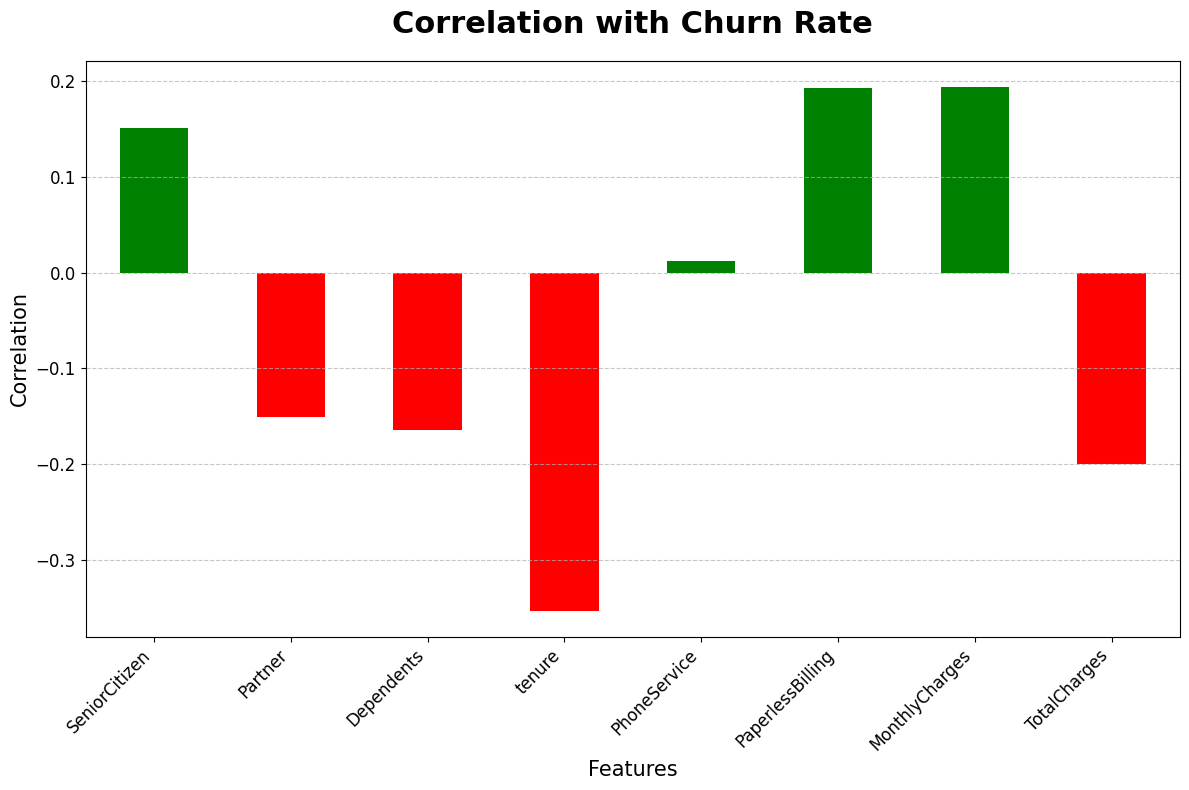

In [26]:
### Coorelation with churn rate

import matplotlib.pyplot as plt

#Create a label encoder object
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique 
le_count = 0
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))
# Assuming data is your DataFrame containing the data

data2 = df[['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']]

# Calculate correlations
correlations = data2.corrwith(df['Churn'])
correlations = correlations[correlations != 1]  # Remove correlations with itself
positive_correlations = correlations[correlations > 0].sort_values(ascending=False)
negative_correlations = correlations[correlations < 0].sort_values(ascending=False)

# Plot correlations
plt.figure(figsize=(12, 8))
correlations.plot(kind='bar', color=correlations.apply(lambda x: 'green' if x > 0 else 'red'))
plt.title('Correlation with Churn Rate', fontsize=22, fontweight='bold', pad=20)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Correlation', fontsize=15)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [27]:
### Feature Selection

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer



# Drop non-numeric columns (assuming they are identifiers or irrelevant for modeling)
data = df.select_dtypes(include=['int', 'float'])

# Separate features and target variable
X = data.drop(columns=['Churn'])
y = data['Churn']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importance
importances = rf.feature_importances_
feature_names = X_imputed.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Select top k features based on importance scores
top_features = feature_importance_df.head(10)['Feature']

# Alternatively, you can use SelectFromModel to automatically select features based on importance threshold
# selector = SelectFromModel(rf, prefit=True, threshold='median')
# X_train_selected = selector.transform(X_train)
# selected_features = X.columns[selector.get_support()]

# Print selected features
print("Selected Features:")
print(top_features)


Selected Features:
7      MonthlyCharges
8        TotalCharges
4              tenure
6    PaperlessBilling
0              gender
2             Partner
1       SeniorCitizen
3          Dependents
5        PhoneService
Name: Feature, dtype: object


c:\Users\Disha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy: 0.7963094393186657
Precision: 0.6580882352941176
Recall: 0.47989276139410186
F1-score: 0.5550387596899224
ROC AUC Score: 0.8442827641889304


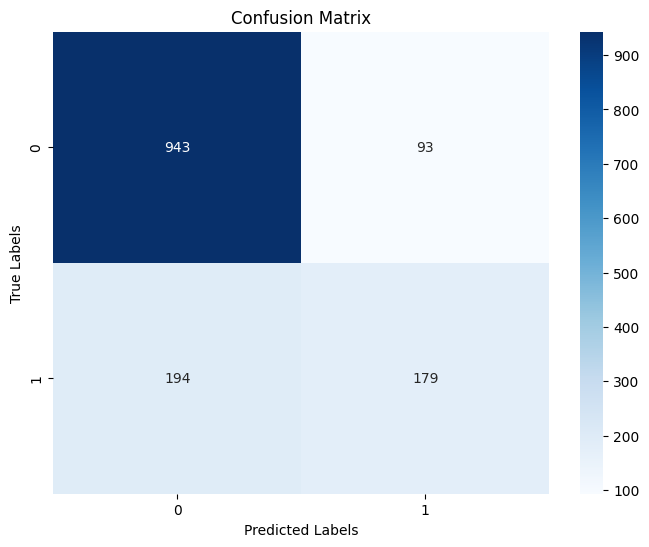

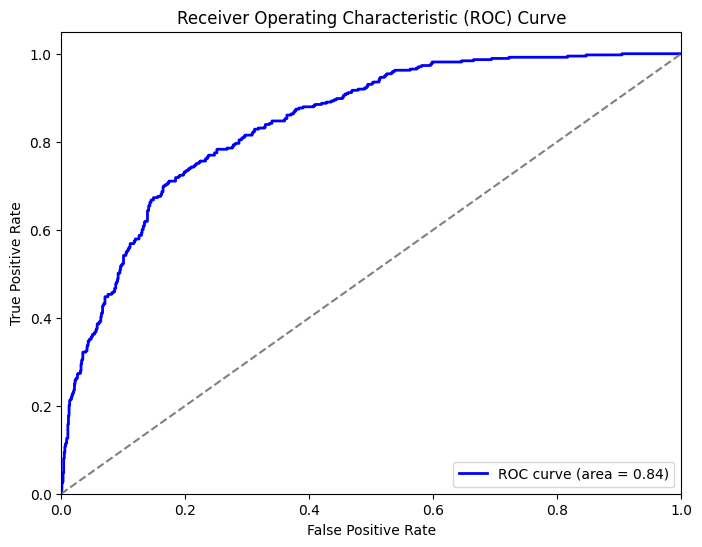

In [29]:
## Build the churn prediction model 

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix





# Keep only the selected features
selected_features = ['MonthlyCharges', 'TotalCharges', 'tenure', 'PaperlessBilling', 
                     'gender', 'Partner', 'SeniorCitizen', 'Dependents', 'PhoneService', 'Churn']
data = df[selected_features]



# Separate features and target variable
X = data.drop(columns=['Churn'])
y = data['Churn']

# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize individual classifiers
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(random_state=42)
lr = LogisticRegression(random_state=42)

# Create a voting classifier with soft voting
voting_clf = VotingClassifier(estimators=[('rf', rf), ('gb', gb), ('lr', lr)], voting='soft')

# Train the voting classifier
voting_clf.fit(X_train_imputed, y_train)

# Predictions on the testing set
y_pred = voting_clf.predict(X_test_imputed)

# Predict probabilities for ROC AUC
y_probs = voting_clf.predict_proba(X_test_imputed)[:, 1]

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)


###Evaluating the model
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC Score:", roc_auc)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
